## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

## Data

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
num_samples, num_features = X.shape
num_classes = len(np.unique(y))
num_samples, num_features, num_classes

(150, 4, 3)

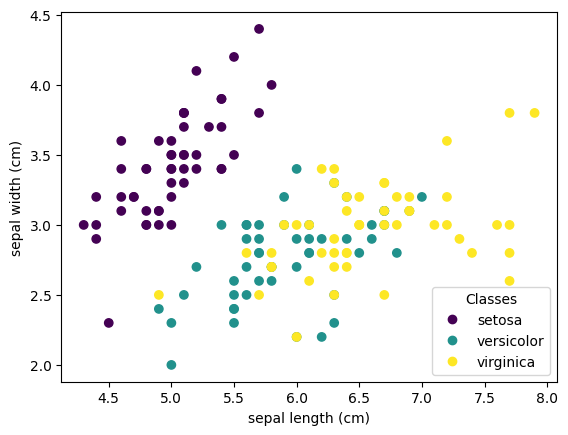

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=10, stratify=y_train)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((108, 4), (12, 4), (108,), (12,))

In [8]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_valid = x_scaler.transform(X_valid)
X_test = x_scaler.transform(X_test)

In [9]:
X_train

array([[-3.77922297e-02, -8.78306897e-01,  7.85414521e-01,
         9.28077650e-01],
       [-2.92889780e-01, -6.39972362e-01,  6.69454482e-01,
         1.06066017e+00],
       [ 3.44854096e-01, -1.63303292e-01,  4.95514424e-01,
         2.65165043e-01],
       [ 1.49279307e+00,  3.13365777e-01,  5.53494444e-01,
         2.65165043e-01],
       [ 2.17305321e-01, -4.01637827e-01,  4.37534405e-01,
         3.97747564e-01],
       [-5.47987330e-01,  1.98170752e+00, -1.41782621e+00,
        -1.06066017e+00],
       [-5.47987330e-01,  1.98170752e+00, -1.18590614e+00,
        -1.06066017e+00],
       [-1.82347508e+00,  3.13365777e-01, -1.41782621e+00,
        -1.32582521e+00],
       [ 1.36524430e+00,  7.50312425e-02,  9.59354579e-01,
         1.19324269e+00],
       [ 1.11014675e+00, -1.63303292e-01,  8.43394540e-01,
         1.45840774e+00],
       [ 1.11014675e+00,  7.50312425e-02,  5.53494444e-01,
         3.97747564e-01],
       [ 7.27500421e-01,  3.13365777e-01,  9.01374560e-01,
      

In [10]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([108, 4]),
 torch.Size([108]),
 torch.Size([12, 4]),
 torch.Size([12]),
 torch.Size([30, 4]),
 torch.Size([30]))

In [11]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [12]:
train_set[10:15]

(tensor([[ 1.1101,  0.0750,  0.5535,  0.3977],
         [ 0.7275,  0.3134,  0.9014,  1.4584],
         [-0.2929, -0.1633,  0.4375,  0.3977],
         [ 0.0898, -0.1633,  0.2636,  0.3977],
         [ 0.9826, -0.1633,  0.3796,  0.2652]]),
 tensor([1, 2, 1, 1, 1]))

In [13]:
train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=10)
test_loader = DataLoader(test_set, batch_size=10)

In [14]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([10, 4]), torch.Size([10]))

In [15]:
len(train_loader)

11

## Model

In [16]:
model = nn.Linear(in_features=num_features, out_features=num_classes)
model

Linear(in_features=4, out_features=3, bias=True)

In [17]:
y_hat = model(x_batch)
y_hat.shape

torch.Size([10, 3])

In [18]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.0991,  0.1705, -0.3814, -0.0984],
         [ 0.0461, -0.1774,  0.2098, -0.0684],
         [ 0.4685,  0.4588,  0.4471,  0.2580]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4517,  0.0919, -0.3560], requires_grad=True))

In [19]:
# a = torch.tensor([5, 2.5, 0.5])
# torch.softmax(a, dim=0)

In [20]:
torch.softmax(y_hat, dim=1)

tensor([[0.2977, 0.3630, 0.3392],
        [0.3547, 0.2554, 0.3900],
        [0.3962, 0.4928, 0.1110],
        [0.7544, 0.1831, 0.0625],
        [0.1809, 0.2072, 0.6118],
        [0.0509, 0.0728, 0.8763],
        [0.3441, 0.3610, 0.2950],
        [0.7670, 0.1192, 0.1138],
        [0.7524, 0.1756, 0.0720],
        [0.7958, 0.1289, 0.0752]], grad_fn=<SoftmaxBackward0>)

In [21]:
# model = nn.Sequential(
#     nn.Linear(num_features, num_classes),
#     nn.Softmax(dim=1))
# model

## Loss

In [22]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [23]:
loss_fn(y_hat, y_batch)

tensor(0.7347, grad_fn=<NllLossBackward0>)

## Optimizer

In [24]:
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## Train

In [25]:
n_epoch = 20
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []
best_loss_valid = 10000

In [26]:
for epoch in range(n_epoch):
    mean_loss_train = mean_loss_valid = 0
    mean_acc_train = mean_acc_valid = 0

    for x_batch, y_batch in train_loader:
        # model
        y_hat = model(x_batch)
        # loss
        loss = loss_fn(y_hat, y_batch)
        # gradient
        loss.backward()
        # update
        optimizer.step()
        optimizer.zero_grad()

        mean_loss_train += loss.item() * len(x_batch)
        mean_acc_train += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

    mean_loss_train = mean_loss_train/len(train_set)
    mean_acc_train = mean_acc_train/len(train_set)
    loss_train_hist.append(mean_loss_train)
    acc_train_hist.append(mean_acc_train)

    with torch.no_grad():
        for x_batch, y_batch in valid_loader:
            y_hat = model(x_batch)
            loss = loss_fn(y_hat, y_batch)
            mean_loss_valid += loss.item() * len(x_batch)
            mean_acc_valid += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

        mean_loss_valid = mean_loss_valid/len(valid_set)
        mean_acc_valid = mean_acc_valid/len(valid_set)
        loss_valid_hist.append(mean_loss_valid)
        acc_valid_hist.append(mean_acc_valid)

    # print(epoch, mean_loss_train/len(train_set), mean_acc_train/len(train_set),
    #       mean_loss_valid/len(valid_set), mean_acc_valid/len(valid_set))
    print(
        f"Epoch: {epoch}    "
        f"LossTrain: {mean_loss_train:.2}    "
        f"AccTrain : {mean_acc_train:.2}    "
        f"LossValid: {mean_loss_valid:.2}    "
        f"AccValid : {mean_acc_valid:.2}    "
    )

    if mean_loss_valid < best_loss_valid:
        torch.save(model, "best-model.pt")
        best_loss_valid = mean_loss_valid
        print("Model Saved!")

Epoch: 0    LossTrain: 0.54    AccTrain : 0.78    LossValid: 0.26    AccValid : 0.92    
Model Saved!
Epoch: 1    LossTrain: 0.32    AccTrain : 0.89    LossValid: 0.21    AccValid : 0.92    
Model Saved!
Epoch: 2    LossTrain: 0.24    AccTrain : 0.94    LossValid: 0.17    AccValid : 1.0    
Model Saved!
Epoch: 3    LossTrain: 0.19    AccTrain : 0.95    LossValid: 0.16    AccValid : 1.0    
Model Saved!
Epoch: 4    LossTrain: 0.17    AccTrain : 0.96    LossValid: 0.15    AccValid : 1.0    
Model Saved!
Epoch: 5    LossTrain: 0.16    AccTrain : 0.97    LossValid: 0.14    AccValid : 1.0    
Model Saved!
Epoch: 6    LossTrain: 0.14    AccTrain : 0.96    LossValid: 0.11    AccValid : 1.0    
Model Saved!
Epoch: 7    LossTrain: 0.13    AccTrain : 0.96    LossValid: 0.13    AccValid : 1.0    
Epoch: 8    LossTrain: 0.13    AccTrain : 0.95    LossValid: 0.11    AccValid : 1.0    
Epoch: 9    LossTrain: 0.12    AccTrain : 0.96    LossValid: 0.12    AccValid : 1.0    
Epoch: 10    LossTrain: 0.1

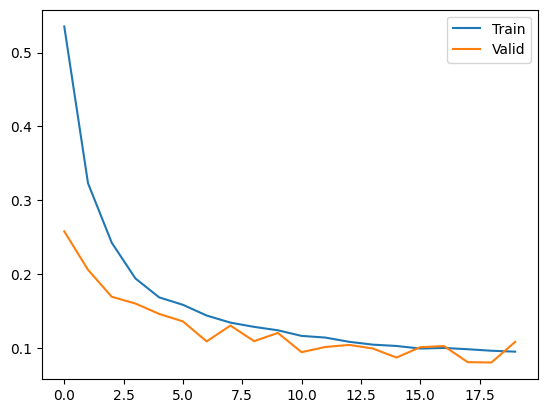

In [27]:
plt.plot(torch.arange(n_epoch), loss_train_hist)
plt.plot(torch.arange(n_epoch), loss_valid_hist)
plt.legend(["Train", "Valid"])

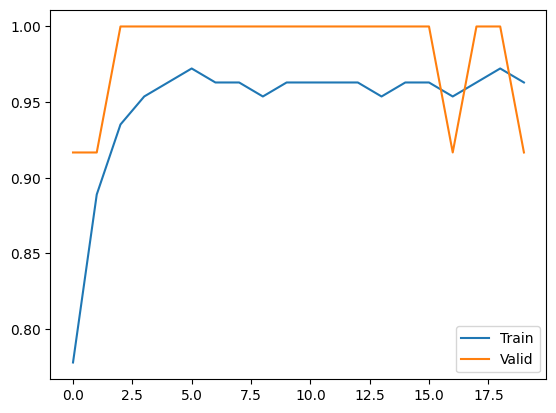

In [28]:
plt.plot(torch.arange(n_epoch), acc_train_hist)
plt.plot(torch.arange(n_epoch), acc_valid_hist)
plt.legend(["Train", "Valid"])

## Test

In [34]:
model = torch.load("best-model.pt", weights_only=False)
model.eval()

Linear(in_features=4, out_features=3, bias=True)

In [35]:
mean_acc_test = 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_hat = model(x_batch)
        mean_acc_test += torch.sum(y_hat.argmax(dim=1) == y_batch).item()
    mean_acc_test = mean_acc_test/len(test_set)

mean_acc_test

1.0